# Sanity Check
Sanity check the `map_converter.ipynb`. Sometimes, the centerline generated is not great, such as what you see for `Spielberg_map`. In these cases, you can increase the interpolation interval in `map_converter.ipynb`, and then clean manually.

Then, you can use this book to sanity check again the points.

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import yaml
from PIL import Image
import os
import pandas as pd

In [56]:
MAP_NAME = "Spa_slammed"
# MAP_NAME = "Spielberg_map"

In [57]:
if os.path.exists(f"maps/{MAP_NAME}.png"):
    map_img_path = f"maps/{MAP_NAME}.png"
elif os.path.exists(f"maps/{MAP_NAME}.pgm"):
    map_img_path = f"maps/{MAP_NAME}.pgm"
else:
    raise Exception("Map not found!")

map_yaml_path = f"maps/{MAP_NAME}.yaml"
map_img = np.array(Image.open(map_img_path).transpose(Image.FLIP_TOP_BOTTOM))
map_img = map_img.astype(np.float64)

# load map yaml
with open(map_yaml_path, 'r') as yaml_stream:
    try:
        map_metadata = yaml.safe_load(yaml_stream)
        map_resolution = map_metadata['resolution']
        origin = map_metadata['origin']
    except yaml.YAMLError as ex:
        print(ex)

# calculate map parameters
orig_x = origin[0]
orig_y = origin[1]
# ??? Should be 0
orig_s = np.sin(origin[2])
orig_c = np.cos(origin[2])


In [58]:
raw_data = pd.read_csv(f"inputs/tracks/{MAP_NAME}.csv")
x = raw_data["# x_m"].values
y = raw_data["y_m"].values
wr = raw_data["w_tr_right_m"].values
wl = raw_data["w_tr_left_m"].values

x -= orig_x
y -= orig_y

x /= map_resolution
y /= map_resolution

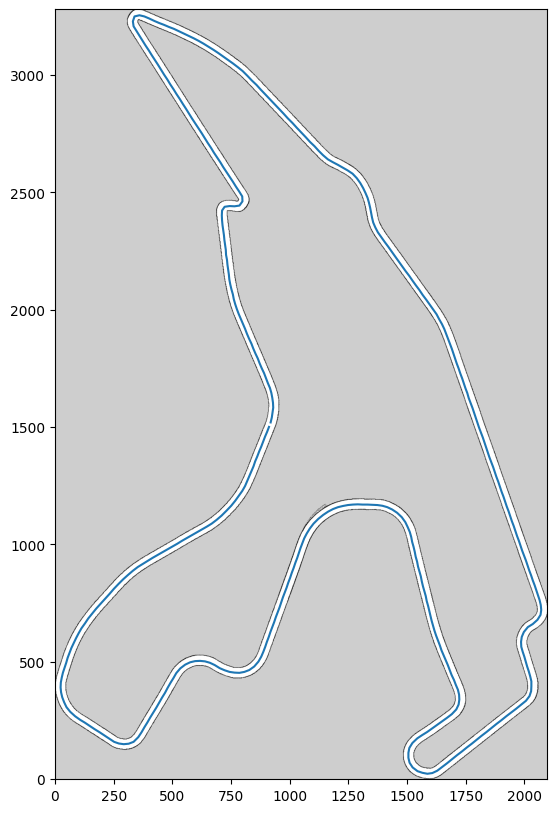

In [59]:
plt.figure(figsize=(10, 10))
plt.imshow(map_img, cmap="gray", origin="lower")
plt.plot(x,y)

In [60]:
# TODO: Add track width visualization, to make sure it's accurate